# RNA expression effects from plasmid DNA transfection

We are consitently seeing that human trans elements are enriched for interferon stimulated response genes like IRF7 and NfKb. I want to ask __if__ there is an effect the RNA expression from the introduction of the plasmid DNA, and if so __what is it?__ and might it explain the trans effects we see.  

To ask this question, I will download GM12878 RNA-seq data from the ENCODE consortia and compare to mine. Since we simulated the AS plasmid library transfection, we can compare the two to find differentially expressed genes. 

## Download data

From ENCODE, I got the "files.txt" which allows the files to be downloaded directly from ENCODE. 

_Note: I did this for two ENCODE RNA-seq datasets

### Wold Data

In [7]:
cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Wold_2021_encode

In [8]:
cat files.txt

"https://www.encodeproject.org/metadata/?type=Experiment&%40id=%2Fexperiments%2FENCSR820PHH%2F&files.output_type=reads&files.output_category=raw+data"
https://www.encodeproject.org/files/ENCFF248MER/@@download/ENCFF248MER.fastq.gz
https://www.encodeproject.org/files/ENCFF006YWA/@@download/ENCFF006YWA.fastq.gz
https://www.encodeproject.org/files/ENCFF249LGZ/@@download/ENCFF249LGZ.fastq.gz
https://www.encodeproject.org/files/ENCFF995BLA/@@download/ENCFF995BLA.fastq.gz


In [ ]:
#this code is directly from ENCODE instructions
xargs -L 1 curl -O -J -L < files.txt

### Gingeras Data

In [1]:
cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode

In [2]:
cat files.txt

"https://www.encodeproject.org/metadata/?type=Experiment&%40id=%2Fexperiments%2FENCSR000AED%2F&files.output_type=reads&files.output_category=raw+data"
https://www.encodeproject.org/files/ENCFF001REH/@@download/ENCFF001REH.fastq.gz
https://www.encodeproject.org/files/ENCFF001REI/@@download/ENCFF001REI.fastq.gz
https://www.encodeproject.org/files/ENCFF001REJ/@@download/ENCFF001REJ.fastq.gz
https://www.encodeproject.org/files/ENCFF001REK/@@download/ENCFF001REK.fastq.gz


In [3]:
#this code is directly from ENCODE instructions
xargs -L 1 curl -O -J -L < files.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3305    0  3305    0     0   4854      0 --:--:-- --:--:-- --:--:--  4853
curl: Saved to filename 'metadata.tsv'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1661  100  1661    0     0   3432      0 --:--:-- --:--:-- --:--:--  3438
100 7357M  100 7357M    0     0  1232k      0  1:41:51  1:41:51 --:--:-- 8700k
curl: Saved to filename 'ENCFF001REH.fastq.gz'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1671  100  1671    0     0   2726      0 --:--:-- --:--:-- --:--:--  2725
100 7182M  100 7182M    0     0  2117k      0  0:57:53  0:57:53 --:--:-- 8647k
curl: Saved to filename 'ENCFF001REI.fastq.gz

## Trim

In [1]:
#PE101
cd /data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode
  
trim_galore -j 4 --paired --fastqc --fastqc_args "--outdir processing_results/fastQC" --dont_gzip --basename Rep1 \
    --output_dir fastq/trimmed_reads fastq/ENCFF001REK.fastq.gz fastq/ENCFF001REJ.fastq.gz
    
trim_galore -j 4 --paired --fastqc --fastqc_args "--outdir processing_results/fastQC" --dont_gzip --basename Rep2 \
    --output_dir fastq/trimmed_reads fastq/ENCFF001REI.fastq.gz fastq/ENCFF001REH.fastq.gz

Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 1.18
Could not detect version of Python used by Cutadapt from the first line of Cutadapt (but found this: >>>#!/bin/sh<<<)
Letting the (modified) Cutadapt deal with the Python version instead
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 4 cores

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /gpfs52/data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode/fastq/trimmed_reads/
Using user-specified basename (>>Rep1<<) instead of deriving the filename from the input file(s)


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> fastq/ENCFF001REK.fastq.gz <<)

Found perfect matches for the following adapter sequences:
Adapter t

5	96465	95261.8	0	96465
6	15464	23815.4	0	15464
7	4786	5953.9	0	4786
8	1171	1488.5	0	1171
9	2846	372.1	0	896 1950
10	3353	93.0	1	762 2591
11	4399	23.3	1	717 3682
12	1353	5.8	1	710 643
13	703	1.5	1	631 72
14	803	1.5	1	728 75
15	560	1.5	1	423 137
16	528	1.5	1	434 94
17	510	1.5	1	450 60
18	222	1.5	1	146 76
19	266	1.5	1	207 59
20	298	1.5	1	200 98
21	215	1.5	1	127 88
22	196	1.5	1	152 44
23	322	1.5	1	234 88
24	396	1.5	1	342 54
25	240	1.5	1	175 65
26	319	1.5	1	184 135
27	235	1.5	1	161 74
28	270	1.5	1	212 58
29	376	1.5	1	200 176
30	528	1.5	1	438 90
31	104	1.5	1	38 66
32	190	1.5	1	133 57
33	151	1.5	1	74 77
34	169	1.5	1	72 97
35	243	1.5	1	146 97
36	175	1.5	1	116 59
37	209	1.5	1	142 67
38	142	1.5	1	72 70
39	170	1.5	1	97 73
40	109	1.5	1	71 38
41	117	1.5	1	62 55
42	139	1.5	1	69 70
43	105	1.5	1	16 89
44	124	1.5	1	39 85
45	120	1.5	1	41 79
46	60	1.5	1	13 47
47	112	1.5	1	12 100
48	82	1.5	1	5 77
49	181	1.5	1	6 175
50	82	1.5	1	13 69
51	32	1.5	1	12 20
52	41	1.5	1	5 36
53	89	1.5	1	8 81
54	64	1.5	1	3 61
55	

68	31	1.4	1	7 24
69	54	1.4	1	9 45
70	107	1.4	1	18 89
71	66	1.4	1	4 62
72	62	1.4	1	1 61
73	38	1.4	1	0 38
74	51	1.4	1	1 50
75	57	1.4	1	1 56
76	48	1.4	1	0 48
77	32	1.4	1	0 32
78	42	1.4	1	0 42
79	57	1.4	1	0 57
80	57	1.4	1	0 57
81	53	1.4	1	0 53
82	58	1.4	1	0 58
83	64	1.4	1	1 63
84	78	1.4	1	0 78
85	47	1.4	1	0 47
86	68	1.4	1	0 68
87	47	1.4	1	0 47
88	54	1.4	1	0 54
89	32	1.4	1	0 32
90	58	1.4	1	0 58
91	37	1.4	1	0 37
92	64	1.4	1	0 64
93	30	1.4	1	0 30
94	34	1.4	1	0 34
95	41	1.4	1	0 41
96	39	1.4	1	0 39
97	34	1.4	1	0 34
98	71	1.4	1	1 70
99	16	1.4	1	0 16
100	19	1.4	1	0 19
101	31	1.4	1	0 31


RUN STATISTICS FOR INPUT FILE: fastq/ENCFF001REI.fastq.gz
93555584 sequences processed in total
The length threshold of paired-end sequences gets evaluated later on (in the validation step)

Writing report to '/gpfs52/data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode/fastq/trimmed_reads/ENCFF001REH.fastq.gz_trimming_report.txt'

SUMMARISING RUN PARAMETERS
Input filename: fastq/ENCFF001REH.fastq

## Map

### Generate index for 100 nt reads

In [ ]:
#Generate indexes for 100bp read length.
HG38_FA='/data/hodges_lab/hg38_genome/hg38.fa'
HG38_GTF='/data/hodges_lab/hg38_genome/Homo_sapiens.GRCh38.104.modified.gtf'

## 50bp ##
#hg38
STAR --runThreadN 8 \
--runMode genomeGenerate \
--genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99 \
--genomeFastaFiles $HG38_FA \
--sjdbGTFfile $HG38_GTF \
--sjdbOverhang 99 #overhang is maximum readlength-1.

### Wold

In [ ]:
## Map to transcriptiome with STAR aligner. 
DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Wold_2021_encode'

#Index paths
HG38_100='/data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99'

#hg38
for EXPT in GM12878_Tech1-Rep1 GM12878_Tech2-Rep1 GM12878_Tech1-Rep2 GM12878_Tech2-Rep2
do
    STAR --runMode alignReads --runThreadN 8 --genomeDir $HG38_100 \
    --readFilesIn ${DIR}/fastq/trimmed_reads/${EXPT}_trimmed.fq \
    --outFileNamePrefix ${DIR}/star-output/${EXPT}_ensembl.104_ --outSAMtype BAM SortedByCoordinate 
done

### Gingeras

In [2]:
## Map to transcriptiome with STAR aligner. 
DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode'

#Index paths
HG38_100='/data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99'

#hg38
for EXPT in Rep1 Rep2
do
    STAR --runMode alignReads --runThreadN 4 --genomeDir $HG38_100 \
    --readFilesIn ${DIR}/fastq/trimmed_reads/${EXPT}_val_1.fq ${DIR}/fastq/trimmed_reads/${EXPT}_val_2.fq \
    --outFileNamePrefix ${DIR}/star-output/${EXPT}_ensembl.104_ --outSAMtype BAM SortedByCoordinate 
done

	STAR --runMode alignReads --runThreadN 4 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99 --readFilesIn /data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode/fastq/trimmed_reads/Rep1_val_1.fq /data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode/fastq/trimmed_reads/Rep1_val_2.fq --outFileNamePrefix /data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode/star-output/Rep1_ensembl.104_ --outSAMtype BAM SortedByCoordinate
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Apr 19 09:44:37 ..... started STAR run
Apr 19 09:44:37 ..... loading genome
Apr 19 09:49:27 ..... started mapping
Apr 19 11:04:08 ..... finished mapping
Apr 19 11:04:15 ..... started sorting BAM
Apr 19 11:25:09 ..... finished successfully
	STAR --runMode alignReads --runThreadN 4 --genomeDir /data/hodges_lab/hg38_genome/hg38_GTF-ensembl.104_index_99 --readFilesIn /data/hodges_lab/public_data/im

## Count

In [ ]:
#wold
HG38_FA='/data/hodges_lab/hg38_genome/hg38.fa'
HG38_GTF='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/Ensembl.v64.fullTransExon.hg19TorheMac2.hg38.gtf'
INT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq'
PUB_DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Wold_2021_encode'

#Seperate into two files, one for paired end reads (ours) the other for single end reads (public data). Join afterwards. 
# For the PE file, will need to assess if fragments or individual reads are counted. 
# For both files, do unstranded mapping since I'm not sure if the public data is forward or reverse stranded. 

#Human
featureCounts -s 0 -B -O -T 8 -F GTF -G $HG38_FA -t exon -g gene_id \
        -a $HG38_GTF -o ${INT_DIR}/count_matricies/GM12878_Wold_ENCODE_RNA-seq_counts_XSAnno_SE.tsv \
        ${PUB_DIR}/star-output/GM12878_Tech{1..2}-Rep1_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/star-output/GM12878_Tech{1..2}-Rep2_ensembl.104_Aligned.sortedByCoord.out.bam

In [4]:
#gingeras
HG38_FA='/data/hodges_lab/hg38_genome/hg38.fa'
HG38_GTF='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/Ensembl.v64.fullTransExon.hg19TorheMac2.hg38.gtf'
INT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq'
PUB_DIR='/data/hodges_lab/public_data/immune-cell_RNA-seq/Gingeras_2014_encode'

#Seperate into two files, one for paired end reads (ours) the other for single end reads (public data). Join afterwards. 
# For the PE file, will need to assess if fragments or individual reads are counted. 
# For both files, do unstranded mapping since I'm not sure if the public data is forward or reverse stranded. 

#Human
featureCounts -s 0 -B -O -T 4 -F GTF -G $HG38_FA -t exon -g gene_id \
        -a $HG38_GTF -o ${INT_DIR}/count_matricies/GM12878_Gingeras_2014_ENCODE_RNA-seq_counts_XSAnno_SE.tsv \
        ${PUB_DIR}/star-output/Rep1_ensembl.104_Aligned.sortedByCoord.out.bam \
        ${PUB_DIR}/star-output/Rep2_ensembl.104_Aligned.sortedByCoord.out.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 2 BAM files                                      ||
||                           o Rep1_ensembl.104_Aligned.sortedByCoord.out ... ||
||                           o Rep2_ensembl.104_Aligned.sortedByCoord.out ... ||
||                                                                            ||
||             Output file : GM12878_Gingeras_2014_ENCODE_RNA-seq

## Differential Expression

In [1]:
# r kernel
suppressPackageStartupMessages(library(tidyverse))

dir <- "/data/hodges_lab/ATAC-STARR_B-cells/data/RNA-seq/count_matricies/"

#read in cts
AS <- read_tsv(paste0(dir,"Human_cross-tissue_RNA-seq_counts_XSAnno_PE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", "GM12878_R1", "GM12878_R2"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length)
                     
Wold <- read_tsv(paste0(dir,"GM12878_Wold_ENCODE_RNA-seq_counts_XSAnno_SE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", 
                     "ENCODE_T1_R1", "ENCODE_T2_R1", "ENCODE_T1_R2", "ENCODE_T2_R2"), 
                     skip = 2) %>% dplyr::select(-Chr, -Start, -End, -Strand, -Length) %>%
                     mutate(Wold_R1 = ENCODE_T1_R1 + ENCODE_T2_R1) %>% 
                     mutate(Wold_R2 = ENCODE_T1_R2 + ENCODE_T2_R2) %>%
                     select(gene_id, Wold_R1, Wold_R2)
                     
Gingeras <- read_tsv(paste0(dir,"GM12878_Gingeras_2014_ENCODE_RNA-seq_counts_XSAnno_SE.tsv"), 
                     col_names = c("gene_id", "Chr", "Start", "End", "Strand", "Length", 
                     "Gingeras_R1", "Gingeras_R2"),skip = 2) %>% 
                     select(gene_id, Gingeras_R1, Gingeras_R2)

Rows: 27898 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_id, Chr, Start, End, Strand
dbl (3): Length, GM12878_R1, GM12878_R2


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 27898 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_id, Chr, Start, End, Strand
dbl (5): Length, ENCODE_T1_R1, ENCODE_T2_R1, ENCODE_T1_R2, ENCODE_T2_R2


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 27898 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_id, Chr, Start, End, Strand
dbl (3): Length, Gingeras_R1, Gingeras_R2


ℹ Use `spec()` to retrieve the full colu

In [2]:
head(AS)
head(Wold)
head(Gingeras)

gene_id,GM12878_R1,GM12878_R2
<chr>,<dbl>,<dbl>
ENSG00000101557,2403,1975
ENSG00000079134,3643,3308
ENSG00000158270,3,2
ENSG00000079101,55,48
ENSG00000176912,573,521
ENSG00000176890,6239,6385


gene_id,Wold_R1,Wold_R2
<chr>,<dbl>,<dbl>
ENSG00000101557,1667,1610
ENSG00000079134,619,659
ENSG00000158270,0,2
ENSG00000079101,16,23
ENSG00000176912,992,951
ENSG00000176890,5952,5471


gene_id,Gingeras_R1,Gingeras_R2
<chr>,<dbl>,<dbl>
ENSG00000101557,3686,3603
ENSG00000079134,3786,4300
ENSG00000158270,0,0
ENSG00000079101,97,84
ENSG00000176912,5581,4448
ENSG00000176890,28197,28245


In [3]:
#join counts and assign gene_id to row_names
cts <- inner_join(AS, Wold, by = "gene_id") %>%
    inner_join(Gingeras, by = "gene_id") %>%
    column_to_rownames(var = "gene_id") %>%
    as.matrix()

In [4]:
head(cts)

,GM12878_R1,GM12878_R2,Wold_R1,Wold_R2,Gingeras_R1,Gingeras_R2
ENSG00000101557,2403,1975,1667,1610,3686,3603
ENSG00000079134,3643,3308,619,659,3786,4300
ENSG00000158270,3,2,0,2,0,0
ENSG00000079101,55,48,16,23,97,84
ENSG00000176912,573,521,992,951,5581,4448
ENSG00000176890,6239,6385,5952,5471,28197,28245


In [5]:
RNames <- c("GM12878_R1", "GM12878_R2",
            "Wold_R1", "Wold_R2",
            "Gingeras_R1", "Gingeras_R2")

condition <- c("plus_plasmid", "plus_plasmid",
               "no_plasmid", "no_plasmid",
               "no_plasmid", "no_plasmid")
               
dataset <- c("ATAC-STARR", "ATAC-STARR", "Wold", "Wold", "Gingeras", "Gingeras")
             
replicates <- c("Rep1", "Rep2", "Rep1", "Rep2", "Rep1", "Rep2")

coldata <- data.frame(row.names = RNames, condition, dataset, replicates)

In [6]:
#check that the coldata matches data. It should print TRUE. 
print(all(rownames(coldata) == colnames(cts)))

[1] TRUE


In [7]:
#diff analysis with DESeq2:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ condition)
dds <- DESeq(dds)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


The following objects are masked from ‘pac

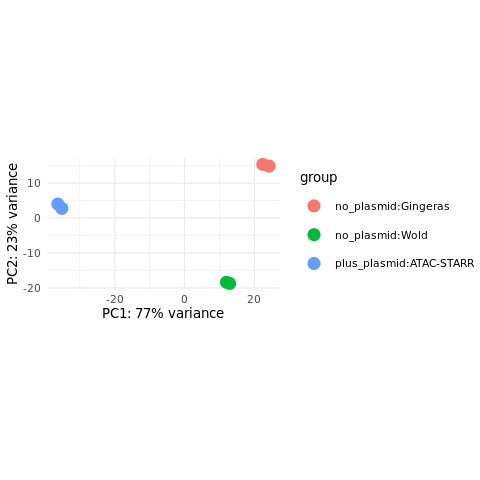

In [60]:
vsd <- vst(dds, blind=FALSE)
p <- plotPCA(vsd, intgroup=c("condition", "dataset")) + theme_minimal(base_size = 8)

options(repr.plot.width = 4, repr.height.plot = 4)
p

ggsave(p, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/with-without_plasmid-DNA_PCA.pdf", 
       device = cairo_pdf, width = 4, height = 4)

In [8]:
#expression counts of specific genes: 
irf7 <- plotCounts(dds, gene="ENSG00000185507", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "IRF7")

irf8 <- plotCounts(dds, gene="ENSG00000140968", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "IRF8")

irf4 <- plotCounts(dds, gene="ENSG00000137265", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "IRF4")

ets1 <- plotCounts(dds, gene="ENSG00000134954", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "ETS1")
       
zbtb7a <- plotCounts(dds, gene="ENSG00000178951", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "ZBTB7A")

mef2c <- plotCounts(dds, gene="ENSG00000081189", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "MEF2C")

nfkb1 <- plotCounts(dds, gene="ENSG00000109320", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "NFKB1")

tcf7 <- plotCounts(dds, gene="ENSG00000081059", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "TCF7")

pax5 <- plotCounts(dds, gene="ENSG00000196092", intgroup=c("condition", "dataset", "replicates"), returnData = TRUE) %>% 
mutate(gene = "PAX5")

In [24]:
genes <- bind_rows(irf7,irf8,irf4,ets1,zbtb7a,mef2c,nfkb1,tcf7,pax5)

genes$gene <- factor(genes$gene, c("IRF4", "IRF7", "IRF8", "ETS1", "ZBTB7A", "MEF2C", "NFKB1", "TCF7", "PAX5"))
genes$dataset <- factor(genes$dataset, c("Wold", "Gingeras", "ATAC-STARR"))

In [10]:
head(genes)

,count,condition,dataset,replicates,gene
,<dbl>,<fct>,<fct>,<chr>,<fct>
GM12878_R1...1,1812.184,plus_plasmid,ATAC-STARR,Rep1,IRF7
GM12878_R2...2,1694.633,plus_plasmid,ATAC-STARR,Rep2,IRF7
Wold_R1...3,1759.785,no_plasmid,Wold,Rep1,IRF7
Wold_R2...4,1565.119,no_plasmid,Wold,Rep2,IRF7
Gingeras_R1...5,4034.934,no_plasmid,Gingeras,Rep1,IRF7
Gingeras_R2...6,3656.325,no_plasmid,Gingeras,Rep2,IRF7


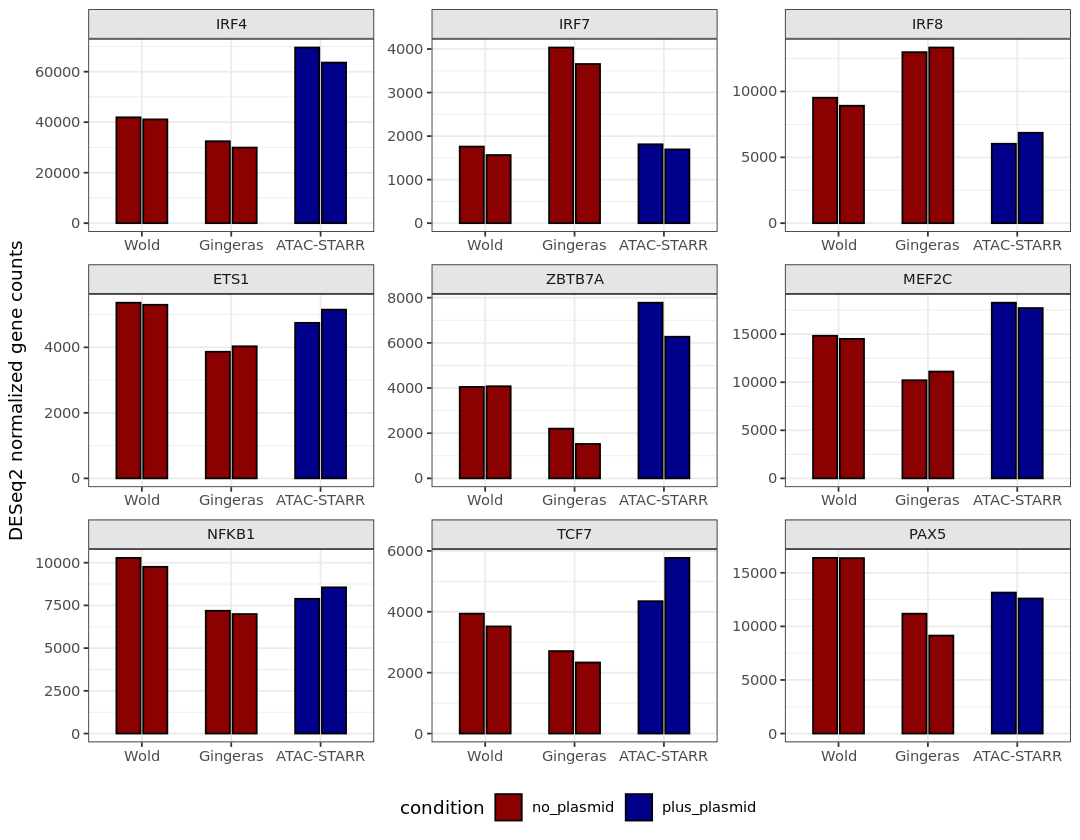

In [33]:
p <- ggplot(genes, aes(x = dataset, y = count, fill = condition)) + 
    geom_col(position = "dodge2", color = "black", width = 0.6) +
    facet_wrap(~gene, scales = "free", nrow = 3) +
    scale_fill_manual(values = c("red4", "blue4")) +
    ylab("DESeq2 normalized gene counts") +
    theme_bw() +
    theme(axis.title.x = element_blank(), legend.position = "bottom", strip.background = element_rect(fill = "grey90"))
        
options(repr.plot.width = 9, repr.plot.height = 7)
p

In [34]:
ggsave(p, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/with-without_plasmid-DNA_gene-counts.pdf", 
       device = cairo_pdf, width = 9, height = 7)

In [8]:
res <- results(dds, name = 'condition_plus_plasmid_vs_no_plasmid')

In [9]:
res_df <- as.data.frame(res)

Warning message:
“Removed 1719 rows containing missing values (geom_point).”


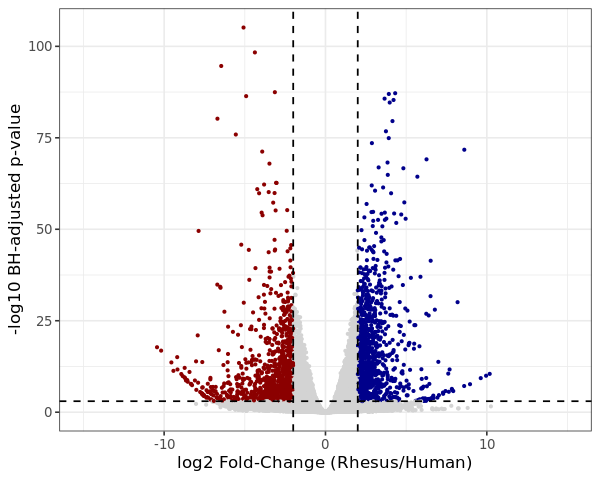

In [13]:
#Plot Volcano plot. First make a new column that classifies each region based on the cutoffs and then order the factored values. 
res_volcano <- mutate(res_df, 
                      Classification = case_when(padj < 0.001 & log2FoldChange > 2 ~ "upregulated", 
                                                             padj < 0.001 & log2FoldChange < -2 ~ "downregulated", 
                                                             padj >= 0.001 | (log2FoldChange < 2 & log2FoldChange > -2) ~ "stable")) %>% filter(Classification != "NA")

res_volcano$Classification <- factor(res_volcano$Classification, levels = c("upregulated", "downregulated", "stable"))

#Plot L2fc and -log10(padj) against each other and color by classificaiton above. 
p <- ggplot(res_volcano) +
  geom_point(aes(x=-log2FoldChange, y=-log10(padj), colour=Classification), size=0.5) +
  geom_hline(yintercept = c(-log10(0.001)), linetype = "dashed") +
  geom_vline(xintercept = c(-2,2), linetype = "dashed") +
  xlab("log2 Fold-Change (Rhesus/Human)") +
  ylab("-log10 BH-adjusted p-value") +
  theme_bw(base_size = 10, base_family = "Arial") +
  theme(legend.position="none", legend.title = element_blank()) +
  scale_colour_manual(values=c("darkred", "darkblue", "lightgrey")) + 
  guides(colour = guide_legend(override.aes = list(size = 2))) +
  coord_cartesian(xlim = c(-15,15))

options(repr.plot.width = 5, repr.plot.height = 4)
p

In [14]:
ggsave(p, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/with-without_plasmid-DNA_volcano.pdf", 
       device = cairo_pdf, width = 5, height = 4)

Warning message:
“Removed 1719 rows containing missing values (geom_point).”


In [12]:
#how many genes?
res_df %>% nrow()
#how many genes are differential? 
res_df %>% filter(padj < 0.001 & log2FoldChange > 2) %>% nrow() #more in ours
res_df %>% filter(padj < 0.001 & log2FoldChange < -2) %>% nrow() #less in ours

[1] 27898

[1] 994

[1] 1094

### GSEA

In [38]:
library(fgsea)
library(org.Hs.eg.db)

#move row names to column called row
res_df <- as.data.frame(res)
res_df <- rownames_to_column(res_df, var = "row")

#get geneinfo
ens2symbol <- AnnotationDbi::select(org.Hs.eg.db,
                                    key=res_df$row, 
                                    columns="SYMBOL",
                                    keytype="ENSEMBL")
ens2symbol <- as_tibble(ens2symbol)

#append gene info to res
res_df <- inner_join(res_df, ens2symbol, by=c("row"="ENSEMBL"))

'select()' returned 1:many mapping between keys and columns



In [41]:
#clean res
res2 <- res_df %>% 
  dplyr::select(SYMBOL, stat) %>% 
  drop_na() %>% 
  distinct() %>% 
  group_by(SYMBOL) %>% 
  summarize(stat=mean(stat))
res2

ranks <- deframe(res2)
head(ranks, 20)

SYMBOL,stat
<chr>,<dbl>
A1BG,2.77535351
A1CF,-0.28431748
A2M,-1.45954495
A2ML1,0.47034107
A3GALT2,0.65272988
A4GALT,2.25678567
A4GNT,0.61437638
AAAS,-5.78141533
AACS,-1.30106411


A1BG        A1CF         A2M       A2ML1     A3GALT2      A4GALT 
 2.77535351 -0.28431748 -1.45954495  0.47034107  0.65272988  2.25678567 
      A4GNT        AAAS        AACS      AACSP1       AADAC     AADACL3 
 0.61437638 -5.78141533 -1.30106411  0.04041174 -0.09175328  0.61437638 
      AADAT       AAGAB        AAK1       AAMDC        AAMP       AANAT 
 0.43806476  0.81604460  4.41250025 -2.07144033 -9.80185493 -0.47161556 
       AAR2       AARS1 
-2.94300059  0.08681745

In [46]:
#get halmark pathways
pathways.hallmark <- gmtPathways("/home/hansetj1/hallmark.gmt")

pathways.hallmark %>% 
  head() %>% 
  lapply(head)

$HALLMARK_TNFA_SIGNALING_VIA_NFKB
[1] "JUNB"    "CXCL2"   "ATF3"    "NFKBIA"  "TNFAIP3" "PTGS2"  

$HALLMARK_HYPOXIA
[1] "PGK1"  "PDK1"  "GBE1"  "PFKL"  "ALDOA" "ENO2" 

$HALLMARK_CHOLESTEROL_HOMEOSTASIS
[1] "FDPS"    "CYP51A1" "IDI1"    "FDFT1"   "DHCR7"   "SQLE"   

$HALLMARK_MITOTIC_SPINDLE
[1] "ARHGEF2" "CLASP1"  "KIF11"   "KIF23"   "ALS2"    "ARF6"   

$HALLMARK_WNT_BETA_CATENIN_SIGNALING
[1] "MYC"    "CTNNB1" "JAG2"   "NOTCH1" "DLL1"   "AXIN2" 

$HALLMARK_TGF_BETA_SIGNALING
[1] "TGFBR1" "SMAD7"  "TGFB1"  "SMURF2" "SMURF1" "BMPR2"

In [47]:
fgseaRes <- fgsea(pathways=pathways.hallmark, stats=ranks, nperm=1000)

Warning message in fgsea(pathways = pathways.hallmark, stats = ranks, nperm = 1000):
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (11.48% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [48]:
fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))

# Show in a nice table:
fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>% 
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

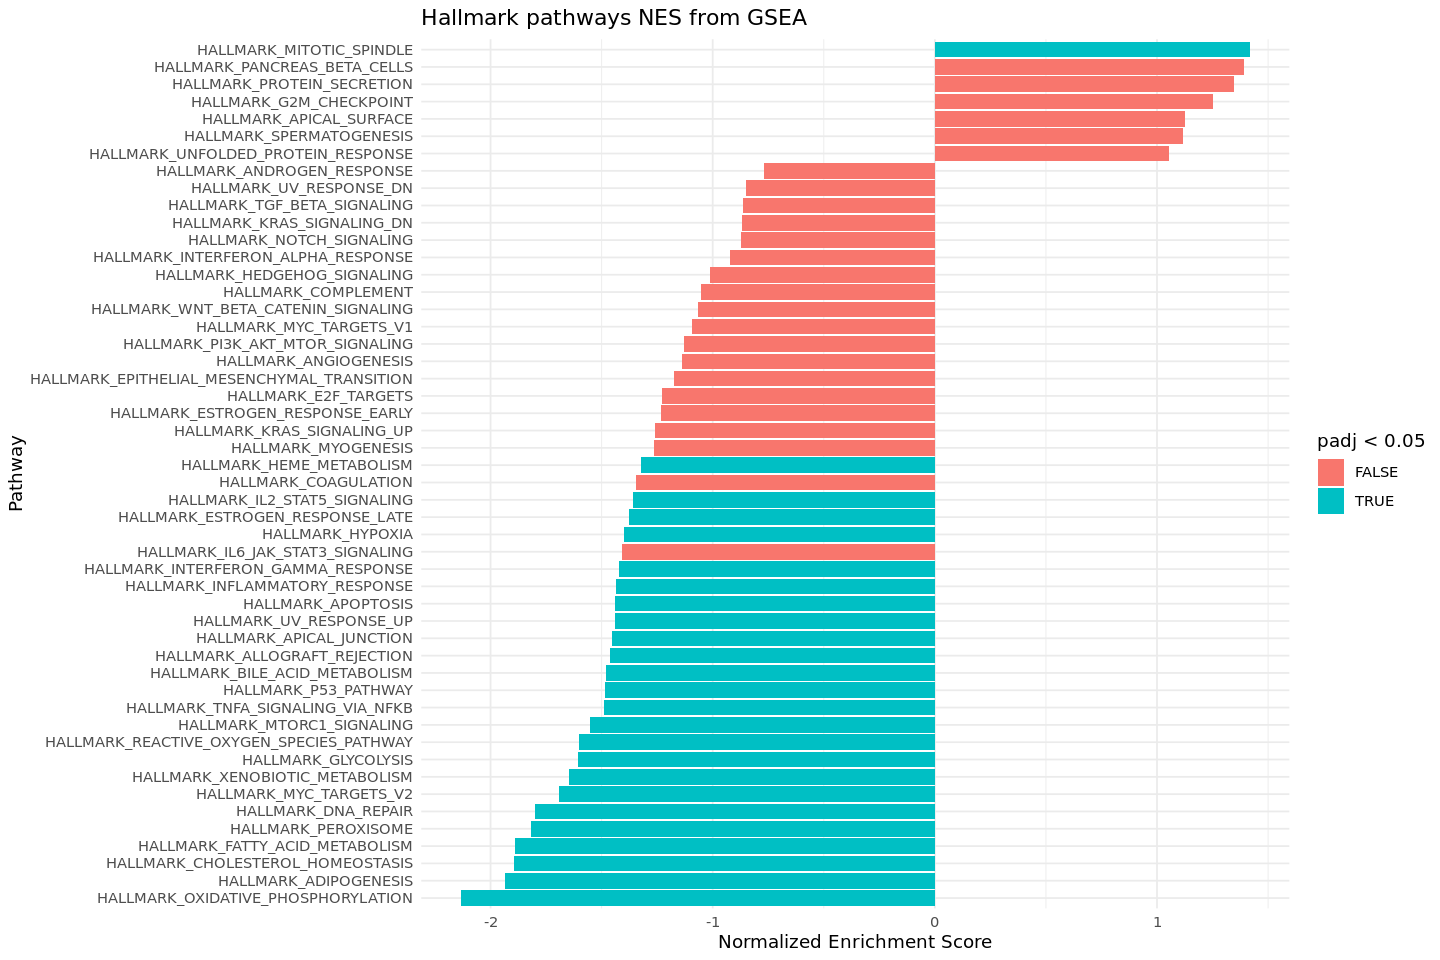

In [51]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(fgseaResTidy, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

In [15]:
diff_genes <- res_df %>% filter(padj < 0.001 & abs(log2FoldChange) > 2) %>% rownames_to_column(var = "geneid")

In [11]:
#run go:
library('ChIPseeker')
library('clusterProfiler')
library('ReactomePA')
library('org.Hs.eg.db')



ChIPseeker v1.30.0  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383

clusterProfiler v4.2.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:stats’:

    filter




In [15]:
entrez <- bitr(diff_genes$geneid, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db) 
enrichment <- enrichPathway(entrez$ENTREZID, pvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(diff_genes$geneid, fromType = "ENSEMBL", toType = "ENTREZID", :
“11.01% of input gene IDs are fail to map...”


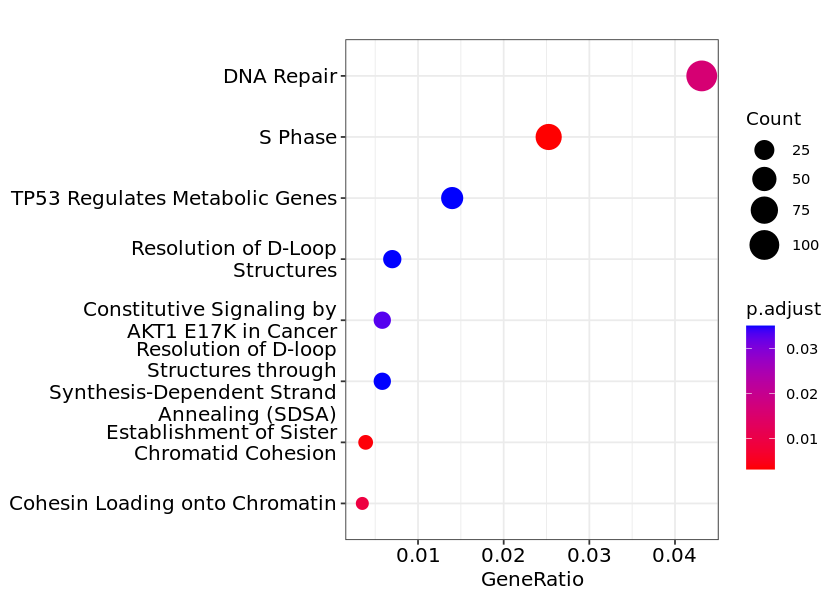

In [18]:
p <- dotplot(enrichment, showCategory = 8)

options(repr.plot.width = 7, repr.plot.height = 5)
p

In [20]:
ggsave(p, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/with-without_plasmid-GO.pdf", 
       device = cairo_pdf, width = 7, height = 5)

In [19]:
enrichment %>% as.data.frame() %>% filter(Description %in% c("Interferon Signaling", "Inteferon alpha/beta signaling"))

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [19]:
up_genes <- res_df %>% filter(padj < 0.001 & log2FoldChange > 2) %>% rownames_to_column(var = "geneid")

In [22]:
entrez <- bitr(up_genes$geneid, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db) 
enrichment <- enrichPathway(entrez$ENTREZID, pvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(up_genes$geneid, fromType = "ENSEMBL", toType = "ENTREZID", :
“29.38% of input gene IDs are fail to map...”


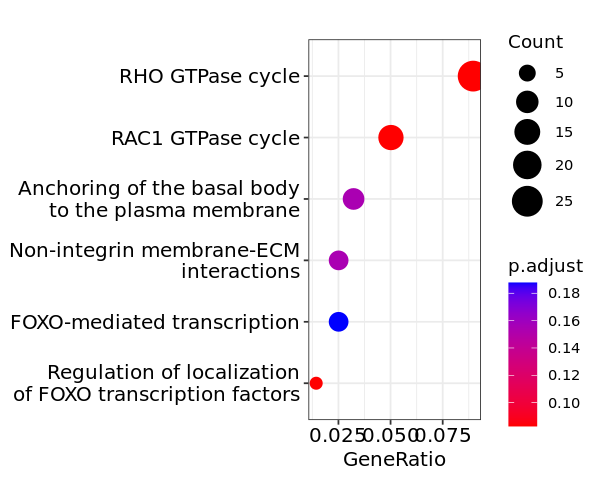

In [26]:
options(repr.plot.width = 5, repr.plot.height = 4)
p <- dotplot(enrichment, showCategory = 8)
p

In [27]:
ggsave(p, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/with-without_plasmid-GO_with-plasmid-enriched.pdf", 
       device = cairo_pdf, width = 5, height = 4)

In [28]:
enrichment %>% as.data.frame() %>% filter(Description %in% c("Interferon Signaling", "Inteferon alpha/beta signaling"))

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(down_genes$geneid, fromType = "ENSEMBL", toType = "ENTREZID", :
“6.22% of input gene IDs are fail to map...”


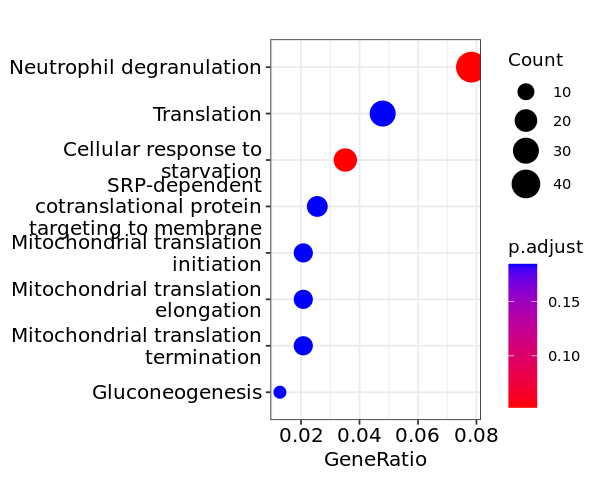

In [12]:
down_genes <- res_df %>% filter(padj < 0.001 & log2FoldChange < -2) %>% rownames_to_column(var = "geneid")
entrez <- bitr(down_genes$geneid, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db) 
enrichment <- enrichPathway(entrez$ENTREZID, pvalueCutoff = 1)
options(repr.plot.width = 5, repr.plot.height = 4)
p <- dotplot(enrichment, showCategory = 8)
p

In [14]:
ggsave(p, filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/with-without_plasmid-GO_minus-plasmid-enriched.pdf", 
       device = cairo_pdf, width = 5, height = 4)

In [13]:
enrichment %>% as.data.frame() %>% filter(Description %in% c("Interferon Signaling", "Inteferon alpha/beta signaling"))

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
